# **Calculate the rates of return of a portfolio of stocks**

**We can use historical rates of return as a reasonable proxy of expected rates of return of a security. We cannot predict returns of a security.**

**Expected Return of the Portfolio E(Rp) = Σ (Weight of each asset × Expected Return of each asset)**

**Sum of weights is equal to one.**

**REFERENCE**: https://www.investopedia.com/ask/answers/061215/how-can-i-calculate-expected-return-my-portfolio.asp#:~:text=The%20formula%20for%20expected%20portfolio,Expected%20Return%20of%20each%20asset)

**1.1 Simple rate of return**



$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

**Log return vs. simple return:**
- use log rate of return when there is a single security whose rate of return is needed over multiple time periods.
- use simple rate of return to compare returns of multiple securities over the same time period

https://en.wikipedia.org/wiki/Rate_of_return,  
https://www.allquant.co/post/magic-of-log-returns-concept-part-1


**2. Extract price data using an API**

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


https://numpy.org/

https://pandas.pydata.org/

https://matplotlib.org/

https://pypi.org/project/yfinance/

https://pandas-datareader.readthedocs.io/en/latest/readers/yahoo.html


**Download data**

In [61]:
# 2.1 Download data using the yahoo finance API
# To calculate return we use the adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*
# Data for trading days. no data for saturdays/sundays and bank holidays.

# 2.1.1 securities inthe portfolio
tickers = ['UL', 'MSFT', 'GOOG', 'AMZN', 'AAPL']

# 2.1.2 dataframe to store the price data of the securities inthe portfolio
df = pd.DataFrame()

# 2.1.3 for each security in the portfolio, download price data using the yahoo finance API and store in the df pandas dataframe
for t in tickers:
    df[t] = yf.download(t, start='2014-1-1')['Adj Close']

# 2.1.4 print metadata on dataframe df
df.info()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2733 entries, 2014-01-02 00:00:00+00:00 to 2024-11-08 00:00:00+00:00
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   UL      2733 non-null   float64
 1   MSFT    2733 non-null   float64
 2   GOOG    2733 non-null   float64
 3   AMZN    2733 non-null   float64
 4   AAPL    2733 non-null   float64
dtypes: float64(5)
memory usage: 128.1 KB


**2.2 Check if the data is ok using the head() and tail() functions of pandas.**

In [62]:
df.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2014-01-02 00:00:00+00:00,27.890928,31.120743,27.656164,19.898500,17.234301
2014-01-03 00:00:00+00:00,27.856331,30.911362,27.454418,19.822001,16.855726
2014-01-06 00:00:00+00:00,27.780222,30.258135,27.760517,19.681499,16.947645
2014-01-07 00:00:00+00:00,27.883991,30.492622,28.295691,19.901501,16.826439
2014-01-08 00:00:00+00:00,27.558813,29.948271,28.354576,20.096001,16.932999


In [63]:
df.tail()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2024-11-04 00:00:00+00:00,60.820427,408.459991,170.679993,195.779999,221.766006
2024-11-05 00:00:00+00:00,61.167629,411.459991,171.410004,199.500000,223.204422
2024-11-06 00:00:00+00:00,58.796715,420.179993,178.330002,207.089996,222.475235
2024-11-07 00:00:00+00:00,59.134003,425.429993,182.279999,210.050003,227.229996
2024-11-08 00:00:00+00:00,59.000000,422.540009,179.860001,208.179993,226.960007


**3. Normalize to 100**

$$
\frac {P_t}{P_0} * 100
$$

**Normalizing enables to compare the price of different stocks starting from the same value. If we do not do this, adjusted closing prices are plotted directly and does not have a good landmark.**

In [64]:
print(df.loc['2014-01-02'])

UL      27.890928
MSFT    31.120743
GOOG    27.656164
AMZN    19.898500
AAPL    17.234301
Name: 2014-01-02 00:00:00+00:00, dtype: float64


In [65]:
print(df.iloc[0])

UL      27.890928
MSFT    31.120743
GOOG    27.656164
AMZN    19.898500
AAPL    17.234301
Name: 2014-01-02 00:00:00+00:00, dtype: float64


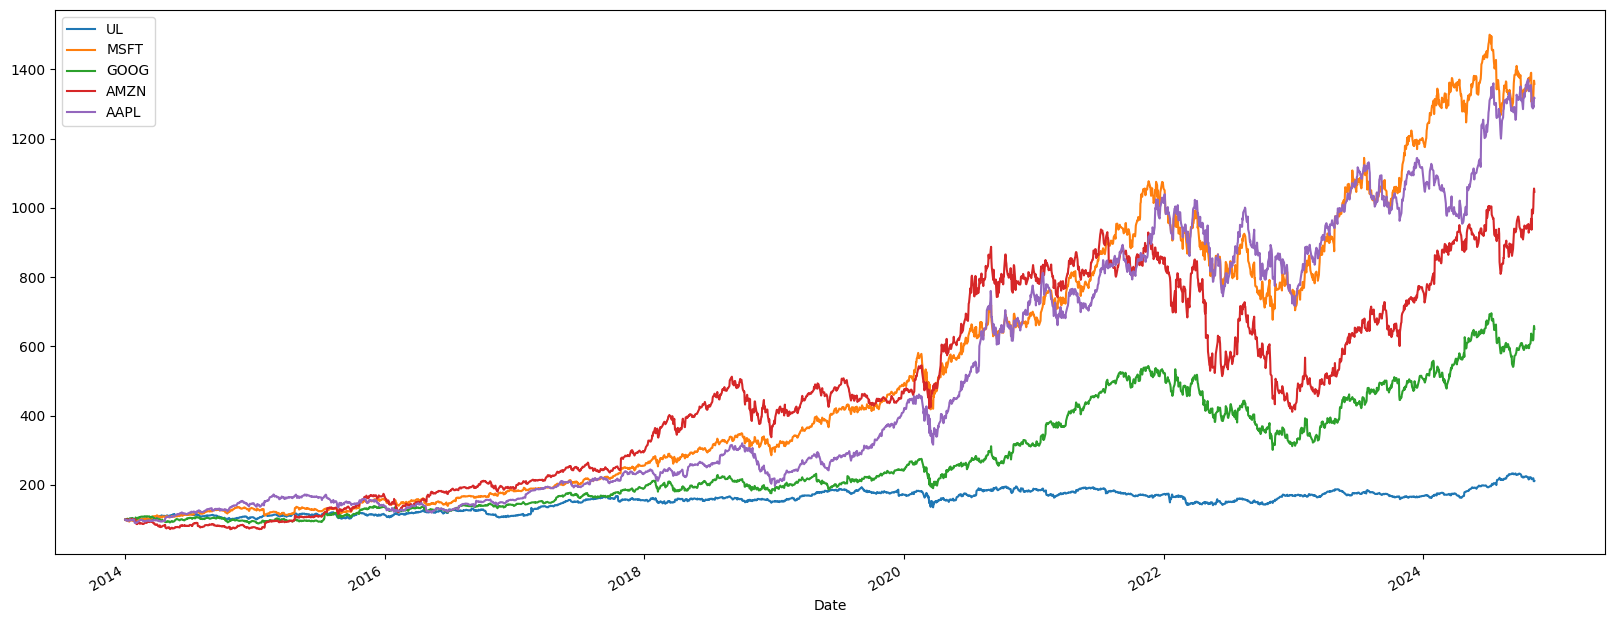

In [66]:
# 3.1 Normalize to 100 and plot prices over time: Normalizing enables to compare the price of different stocks starting from the same value.
# plot the normalized data
(df / df.iloc[0] * 100).plot(figsize = (20, 8));
plt.show()

**4. Calculate returns of the securities in the portfolio**



**4.1 Simple return of a security**

$$
\frac{P_1 - P_0}{P_0} = \frac{P_1}{P_0} - 1
$$

*To calculate return, we will use the adjusted close price as it reflects dividend payments to shareholders and operations such as stock splits.*

*The shift(n) method in pandas gives the value at row with lag n.
https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.shift.html*

In [67]:
# 4.1 Calculate the daily simple rate of returns of the securities in the portfolio using the adjusted close price
returns = (df / df.shift(1)) - 1
returns.head()

,UL,MSFT,GOOG,AMZN,AAPL
Date,,,,,
2014-01-02 00:00:00+00:00,NaN,NaN,NaN,NaN,NaN
2014-01-03 00:00:00+00:00,-0.001240,-0.006728,-0.007295,-0.003845,-0.021966
2014-01-06 00:00:00+00:00,-0.002732,-0.021132,0.011149,-0.007088,0.005453
2014-01-07 00:00:00+00:00,0.003735,0.007750,0.019278,0.011178,-0.007152
2014-01-08 00:00:00+00:00,-0.011662,-0.017852,0.002081,0.009773,0.006333


**4.2 Annual returns of the securities**

In [68]:
#4.2 Calculate annual returns of securities. Approx 250 trading days in a year.
annual_returns = returns.mean() * 250
print(annual_returns)

UL      0.090287
MSFT    0.273821
GOOG    0.209758
AMZN    0.268107
AAPL    0.274979
dtype: float64


**4.3 Calculate the risk of the securities in the portfolio**

*Risk is the volatility/variability of returns. It is measured by variance or standard deviation of returns of a stock. It measures the deviation from the mean. A volatile stock is more likely to deviate from historical returns and surprise investors*

**References:**
https://www.investopedia.com/ask/answers/021915/how-standard-deviation-used-determine-risk.asp
https://www.investopedia.com/terms/s/standarddeviation.asp
https://www.investopedia.com/articles/stocks/11/calculating-risk-reward.asp#:~:text=When%20you%27re%20an%20individual,price%20of%20your%20maximum%20risk.

In [69]:
# 4.3.1 Daily risk of each security
print(returns.std())

UL      0.013177
MSFT    0.016745
GOOG    0.017543
AMZN    0.020655
AAPL    0.017658
dtype: float64


Annual risk = square root of (variance of daily returns * 250) = standard deviation of daily returns * square root of 250

In [70]:
# 4.3.1 Annual risk of each security
print (returns.std() ** 250 ** 0.5)

UL      1.868341e-30
MSFT    8.260254e-29
GOOG    1.725494e-28
AMZN    2.280786e-27
AAPL    1.913464e-28
dtype: float64


# **5. Portfolio annual return**

**FORMULA: Expected Return of the Portfolio E(Rp) = Σ (Weight of each asset × Expected Return of each asset)**

**Sum of weights is equal to one.**

**We will use the dot() method in numpy to calculate the dot product of weights of securities and return of securities in the portfolio.  This will multiply each stock’s weight and respective return and sum them.**

In [71]:
#5.1 weights of the securities in portfolios
# ['UL', 'MSFT', 'GOOG', 'AMZN', 'AAPL']

#5.1.1 weights of the securities in portfolio1
weights1 = np.array([0.20, 0.20, 0.20, 0.20, 0.20])

#5.1.2 weights of the securities in portfolio2
weights2 = np.array([0.2,0.3,0.15,0.15,0.2])

In [58]:
#5.2.1 Expected annual rate of return of Portfolio 1
portfolio_annual_return1 = np.dot(annual_returns, weights1)
print("Portfolio 1 - Annual return %: ", 100*portfolio_annual_return1)

Portfolio 1 - Annual return %:  22.33904345553007


In [72]:
#5.2.2 Expected annual rate of return of Portfolio 2
portfolio_annual_return2 = np.dot(annual_returns, weights2)
print("Portfolio 2 - Annual return %: ", 100*portfolio_annual_return2)

Portfolio 2 - Annual return %:  22.687927005249616


Portfolio volatility - to be covered in the next exercise